In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
Dataset = pd.read_csv("Dataset_Final.csv")

In [3]:
Dataset.isnull().sum()

Unnamed: 0                        0
Hospital_Name                     0
Age                               0
BMI                               0
LOS                               0
Average_Daily_Use_Cigarettes      0
Hookah_Consumption                0
SystolicBP                        0
DiastolicBP                       0
Respiratory_rate                  0
Oxygen_Saturation_Percent         0
Intubation_Duration_Day           0
ICU_LOS                           0
Total_Lung_Involvement_Percent    0
NIV_Duration_Day                  0
Total_Lung_Involvement_Rank       8
Sex                               0
Current_Smoking                   0
History_hookah                    0
Drug_history                      0
Sweating                          0
Fever                             0
Dyspnea                           0
Chestpain                         0
Abnormal_Lung_Signs               0
Diabetes                          0
Hypertension                      0
Cancers                     

In [4]:
Dataset.drop("Unnamed: 0", axis = 1 , inplace=True)
Dataset.drop("Hospital_Name", axis = 1 , inplace=True)
Dataset.drop("Total_Lung_Involvement_Rank", axis = 1 , inplace=True)
Dataset.drop("Hookah_Consumption", axis = 1 , inplace=True)
Dataset.drop("LOS", axis = 1 , inplace=True)
Dataset.drop("ICU_LOS", axis = 1 , inplace=True)
Dataset.head()

,Age,BMI,Average_Daily_Use_Cigarettes,SystolicBP,DiastolicBP,Respiratory_rate,Oxygen_Saturation_Percent,Intubation_Duration_Day,Total_Lung_Involvement_Percent,NIV_Duration_Day,...,Cancers,Cardiovascular_Disease,CKD,COPD,Immunosuppressant_Drugs,Antihypertensive_drug,Pantoprazole,Hospitalization_14_days_ago,ICU_admission,Death
0,61.0,20.500000,0.0,122.422697,78.0,19.718638,91.0,0,0.0,0,...,0,0,0,0,0,1,0,0.0,1.0,1
1,74.0,26.700000,0.0,40.000000,75.0,16.000000,75.0,0,0.0,0,...,0,1,1,0,0,0,1,1.0,1.0,1
2,51.0,29.100000,0.0,122.422697,78.0,19.718638,91.0,0,0.0,0,...,0,0,0,0,0,0,0,1.0,1.0,1
3,64.0,41.000000,0.0,136.000000,78.0,20.000000,95.0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,1.0,0
4,20.0,26.148507,0.0,113.000000,76.0,19.000000,92.0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,2.0,1


In [5]:
#Controlling Outlier data
data_mean, data_std = np.mean(Dataset['Age']), np.std(Dataset['Age'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Age'] if x < lower or x > upper]
print('Age Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['BMI']), np.std(Dataset['BMI'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['BMI'] if x < lower or x > upper]
print('BMI Column Identified outliers: %d' % len(outliers))


for i in range(len(Dataset['BMI'])):
    if Dataset['BMI'][i] < lower:
        Dataset['BMI'][i] = lower
        
        
for i in range(len(Dataset['BMI'])):
    if Dataset['BMI'][i] > upper:
        Dataset['BMI'][i] = upper
        

outliers = [x for x in Dataset['BMI'] if x < lower or x > upper]
print('BMI Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Average_Daily_Use_Cigarettes']), np.std(Dataset['Average_Daily_Use_Cigarettes'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Average_Daily_Use_Cigarettes'] if x < lower or x > upper]
print('Average_Daily_Use_Cigarettes Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Average_Daily_Use_Cigarettes'])):
    if Dataset['Average_Daily_Use_Cigarettes'][i] < lower:
        Dataset['Average_Daily_Use_Cigarettes'][i] = lower
        
        
for i in range(len(Dataset['Average_Daily_Use_Cigarettes'])):
    if Dataset['Average_Daily_Use_Cigarettes'][i] > upper:
        Dataset['Average_Daily_Use_Cigarettes'][i] = upper
        

outliers = [x for x in Dataset['Average_Daily_Use_Cigarettes'] if x < lower or x > upper]
print('Average_Daily_Use_Cigarettes Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['SystolicBP']), np.std(Dataset['SystolicBP'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['SystolicBP'] if x < lower or x > upper]
print('SystolicBP Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['SystolicBP'])):
    if Dataset['SystolicBP'][i] < lower:
        Dataset['SystolicBP'][i] = lower
        
        
for i in range(len(Dataset['SystolicBP'])):
    if Dataset['SystolicBP'][i] > upper:
        Dataset['SystolicBP'][i] = upper
        

outliers = [x for x in Dataset['SystolicBP'] if x < lower or x > upper]
print('SystolicBP Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['DiastolicBP']), np.std(Dataset['DiastolicBP'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['DiastolicBP'] if x < lower or x > upper]
print('DiastolicBP Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['DiastolicBP'])):
    if Dataset['DiastolicBP'][i] < lower:
        Dataset['DiastolicBP'][i] = lower
       

for i in range(len(Dataset['DiastolicBP'])):
    if Dataset['DiastolicBP'][i] > upper:
        Dataset['DiastolicBP'][i] = upper
    

outliers = [x for x in Dataset['DiastolicBP'] if x < lower or x > upper]
print('DiastolicBP Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Respiratory_rate']), np.std(Dataset['Respiratory_rate'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Respiratory_rate'] if x < lower or x > upper]
print('Respiratory_rate Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Respiratory_rate'])):
    if Dataset['Respiratory_rate'][i] < lower:
        Dataset['Respiratory_rate'][i] = lower
 
        
for i in range(len(Dataset['Respiratory_rate'])):
    if Dataset['Respiratory_rate'][i] > upper:
        Dataset['Respiratory_rate'][i] = upper
   

outliers = [x for x in Dataset['Respiratory_rate'] if x < lower or x > upper]
print('Respiratory_rate Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Oxygen_Saturation_Percent']), np.std(Dataset['Oxygen_Saturation_Percent'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Oxygen_Saturation_Percent'] if x < lower or x > upper]
print('Oxygen_Saturation_Percent Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Oxygen_Saturation_Percent'])):
    if Dataset['Oxygen_Saturation_Percent'][i] < lower:
        Dataset['Oxygen_Saturation_Percent'][i] = lower

        
for i in range(len(Dataset['Oxygen_Saturation_Percent'])):
    if Dataset['Oxygen_Saturation_Percent'][i] > upper:
        Dataset['Oxygen_Saturation_Percent'][i] = upper


outliers = [x for x in Dataset['Oxygen_Saturation_Percent'] if x < lower or x > upper]
print('Oxygen_Saturation_Percent Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Intubation_Duration_Day']), np.std(Dataset['Intubation_Duration_Day'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Intubation_Duration_Day'] if x < lower or x > upper]
print('Intubation_Duration_Day Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Intubation_Duration_Day'])):
    if Dataset['Intubation_Duration_Day'][i] < lower:
        Dataset['Intubation_Duration_Day'][i] = lower

        
for i in range(len(Dataset['Intubation_Duration_Day'])):
    if Dataset['Intubation_Duration_Day'][i] > upper:
        Dataset['Intubation_Duration_Day'][i] = upper


outliers = [x for x in Dataset['Intubation_Duration_Day'] if x < lower or x > upper]
print('Intubation_Duration_Day Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['Total_Lung_Involvement_Percent']), np.std(Dataset['Total_Lung_Involvement_Percent'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['Total_Lung_Involvement_Percent'] if x < lower or x > upper]
print('Total_Lung_Involvement_Percent Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['Total_Lung_Involvement_Percent'])):
    if Dataset['Total_Lung_Involvement_Percent'][i] < lower:
        Dataset['Total_Lung_Involvement_Percent'][i] = lower

        
for i in range(len(Dataset['Total_Lung_Involvement_Percent'])):
    if Dataset['Total_Lung_Involvement_Percent'][i] > upper:
        Dataset['Total_Lung_Involvement_Percent'][i] = upper


outliers = [x for x in Dataset['Total_Lung_Involvement_Percent'] if x < lower or x > upper]
print('Total_Lung_Involvement_Percent Column Identified outliers: %d' % len(outliers))
#############################################################################################
data_mean, data_std = np.mean(Dataset['NIV_Duration_Day']), np.std(Dataset['NIV_Duration_Day'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in Dataset['NIV_Duration_Day'] if x < lower or x > upper]
print('NIV_Duration_Day Column Identified outliers: %d' % len(outliers))

for i in range(len(Dataset['NIV_Duration_Day'])):
    if Dataset['NIV_Duration_Day'][i] < lower:
        Dataset['NIV_Duration_Day'][i] = lower

        
for i in range(len(Dataset['NIV_Duration_Day'])):
    if Dataset['NIV_Duration_Day'][i] > upper:
        Dataset['NIV_Duration_Day'][i] = upper


outliers = [x for x in Dataset['NIV_Duration_Day'] if x < lower or x > upper]
print('NIV_Duration_Day Column Identified outliers: %d' % len(outliers))

Age Column Identified outliers: 0
BMI Column Identified outliers: 8
BMI Column Identified outliers: 0
Average_Daily_Use_Cigarettes Column Identified outliers: 8
Average_Daily_Use_Cigarettes Column Identified outliers: 0
SystolicBP Column Identified outliers: 9
SystolicBP Column Identified outliers: 0
DiastolicBP Column Identified outliers: 9
DiastolicBP Column Identified outliers: 0
Respiratory_rate Column Identified outliers: 6
Respiratory_rate Column Identified outliers: 0
Oxygen_Saturation_Percent Column Identified outliers: 14
Oxygen_Saturation_Percent Column Identified outliers: 0
Intubation_Duration_Day Column Identified outliers: 13
Intubation_Duration_Day Column Identified outliers: 0
Total_Lung_Involvement_Percent Column Identified outliers: 30
Total_Lung_Involvement_Percent Column Identified outliers: 0
NIV_Duration_Day Column Identified outliers: 11
NIV_Duration_Day Column Identified outliers: 0


C:\Users\alish\AppData\Local\Temp\ipykernel_1220\1012456011.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['BMI'][i] = upper
C:\Users\alish\AppData\Local\Temp\ipykernel_1220\1012456011.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['Average_Daily_Use_Cigarettes'][i] = upper
C:\Users\alish\AppData\Local\Temp\ipykernel_1220\1012456011.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset['SystolicBP'][i

In [6]:
X = Dataset[Dataset.columns.difference(["Death"])] 
Y = Dataset["Death"]

In [7]:
sm = SMOTE(random_state=42)
X_balanced, Y_balanced = sm.fit_resample(X, Y)

In [8]:
X_balanced[['Age', 'BMI','Average_Daily_Use_Cigarettes',
       'SystolicBP', 'DiastolicBP', 'Respiratory_rate',
       'Oxygen_Saturation_Percent', 'Intubation_Duration_Day', 'Total_Lung_Involvement_Percent'
       ,'NIV_Duration_Day']] = normalize(X_balanced[['Age', 'BMI', 'Average_Daily_Use_Cigarettes',
       'SystolicBP', 'DiastolicBP', 'Respiratory_rate',
       'Oxygen_Saturation_Percent', 'Intubation_Duration_Day', 'Total_Lung_Involvement_Percent'
       ,'NIV_Duration_Day']])
X_balanced.head()

,Abnormal_Lung_Signs,Age,Antihypertensive_drug,Average_Daily_Use_Cigarettes,BMI,CKD,COPD,Cancers,Cardiovascular_Disease,Chestpain,...,Immunosuppressant_Drugs,Intubation_Duration_Day,NIV_Duration_Day,Oxygen_Saturation_Percent,Pantoprazole,Respiratory_rate,Sex,Sweating,SystolicBP,Total_Lung_Involvement_Percent
0,0,0.331393,1,0.0,0.111370,0,0,0,0,0,...,0,0.0,0.0,0.494373,0,0.107125,1.0,0,0.665082,0.0
1,0,0.504618,0,0.0,0.182071,1,0,0,1,0,...,0,0.0,0.0,0.511437,1,0.109106,1.0,0,0.420918,0.0
2,0,0.279945,0,0.0,0.159734,0,0,0,0,0,...,0,0.0,0.0,0.499511,0,0.108238,1.0,0,0.671994,0.0
3,0,0.322031,0,0.0,0.187998,0,0,0,0,0,...,0,0.0,0.0,0.478015,0,0.100635,1.0,0,0.684317,0.0
4,0,0.118566,0,0.0,0.155016,0,0,0,0,0,...,0,0.0,0.0,0.545404,0,0.112638,1.0,0,0.669898,0.0


In [9]:
def display_results(results):
    print(f'Best parameters are: {results.best_params_}')
    print(f'Best Score is : {results.best_score_} ')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
def showResults(model, modelType , X, Y):
    scores_accuracy = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
    scores_log_loss = cross_val_score(model, X, Y, cv=10, scoring='neg_log_loss')
    scores_briar = cross_val_score(model, X, Y, cv=10, scoring='neg_brier_score')
    scores_auc = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
    scores_recall = cross_val_score(model, X, Y, cv=10, scoring='recall')
    scores_precision = cross_val_score(model, X, Y, cv=10, scoring='precision')
    scores_f1 = cross_val_score(model, X, Y, cv=10, scoring='f1')
    print('K-fold cross-validation results:')
    print(modelType ," average accuracy is %2.3f" % scores_accuracy.mean())
    print(modelType ," average log_loss is %2.3f" % -scores_log_loss.mean())
    print(modelType ," average brier score is %2.3f" % -scores_briar.mean())
    print(modelType ," average auc is %2.3f" % scores_auc.mean())
    print(modelType ," average recall is %2.3f" % scores_recall.mean())
    print(modelType ," average precision is %2.3f" % scores_precision.mean())
    print(modelType ," average f1 is %2.3f" % scores_f1.mean())
    
params_logistic = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-3,3,7),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear']
}

params_bayes = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [10]:
#Statistical Input
X = X_balanced[["Age", "Oxygen_Saturation_Percent", "Sweating", "Abnormal_Lung_Signs", "CKD",
             "Hospitalization_14_days_ago", "BMI", "Sex", "Current_Smoking", "Fever", "Chestpain",
               "Hypertension", "Cancers", "Cardiovascular_Disease", "Immunosuppressant_Drugs", 
                "Antihypertensive_drug", "Pantoprazole"]]
Y = Y_balanced

In [11]:
lr = LogisticRegression(random_state=5)

cv = GridSearchCV(lr,params_logistic,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 63 candidates, totalling 630 fits


C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [12]:
display_results(cv)

Best parameters are: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score is : 0.708622154264356 


nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.634 + or -0.109 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.634 + or -0.109 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.646 + or -0.098 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.01, 'penalty

In [13]:
lr = LogisticRegression(random_state=5, 
                        C = 100,
                        penalty = 'l1', 
                        solver = 'liblinear')
lr.fit(X,Y)

showResults(lr, "Logistic Regression", X, Y)

K-fold cross-validation results:
Logistic Regression  average accuracy is 0.709
Logistic Regression  average log_loss is 0.577
Logistic Regression  average brier score is 0.191
Logistic Regression  average auc is 0.779
Logistic Regression  average recall is 0.759
Logistic Regression  average precision is 0.690
Logistic Regression  average f1 is 0.722


In [14]:
nb = GaussianNB()

cv = GridSearchCV(nb,params_bayes,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [15]:
display_results(cv)

Best parameters are: {'var_smoothing': 0.0001}
Best Score is : 0.6514525993883793 


0.637 + or -0.078 for the {'var_smoothing': 1.0}
0.635 + or -0.075 for the {'var_smoothing': 0.8111308307896871}
0.634 + or -0.077 for the {'var_smoothing': 0.657933224657568}
0.64 + or -0.075 for the {'var_smoothing': 0.533669923120631}
0.641 + or -0.075 for the {'var_smoothing': 0.43287612810830584}
0.645 + or -0.077 for the {'var_smoothing': 0.3511191734215131}
0.644 + or -0.077 for the {'var_smoothing': 0.2848035868435802}
0.642 + or -0.073 for the {'var_smoothing': 0.23101297000831597}
0.639 + or -0.072 for the {'var_smoothing': 0.1873817422860384}
0.639 + or -0.068 for the {'var_smoothing': 0.15199110829529336}
0.64 + or -0.068 for the {'var_smoothing': 0.12328467394420659}
0.64 + or -0.068 for the {'var_smoothing': 0.1}
0.64 + or -0.07 for the {'var_smoothing': 0.08111308307896872}
0.64 + or -0.07 for the {'var_smoothing': 0.0657933224657568}
0.643 + or -0.07 for the {'var_smoothing': 0.05336699

In [16]:
nb = GaussianNB(var_smoothing= 0.0001)
nb.fit(X,Y)

showResults(nb, "Naive Bayes", X, Y)

K-fold cross-validation results:
Naive Bayes  average accuracy is 0.651
Naive Bayes  average log_loss is 1.769
Naive Bayes  average brier score is 0.318
Naive Bayes  average auc is 0.752
Naive Bayes  average recall is 0.949
Naive Bayes  average precision is 0.597
Naive Bayes  average f1 is 0.732


In [17]:
#Statistical Input With Post admission variables
X = X_balanced[["Age", "Oxygen_Saturation_Percent", "Sweating", "Abnormal_Lung_Signs", "CKD",
             "Hospitalization_14_days_ago", "BMI", "Sex", "Current_Smoking", "Fever", "Chestpain",
               "Hypertension", "Cancers", "Cardiovascular_Disease", "Immunosuppressant_Drugs", 
                "Antihypertensive_drug", "Pantoprazole",'Intubation_Duration_Day','NIV_Duration_Day',
               "ICU_admission"]]
Y = Y_balanced

In [18]:
lr = LogisticRegression(random_state=5)

cv = GridSearchCV(lr,params_logistic,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 63 candidates, totalling 630 fits


C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [19]:
display_results(cv)

Best parameters are: {'C': 1000.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score is : 0.7908511722731906 


nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.76 + or -0.104 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.76 + or -0.104 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.554 + or -0.036 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.01, 'penalty

In [20]:
lr = LogisticRegression(random_state=5, 
                        C = 1000,
                        penalty = 'l1', 
                        solver = 'liblinear')
lr.fit(X,Y)

showResults(lr, "Logistic Regression", X, Y)

K-fold cross-validation results:
Logistic Regression  average accuracy is 0.791
Logistic Regression  average log_loss is 0.487
Logistic Regression  average brier score is 0.153
Logistic Regression  average auc is 0.857
Logistic Regression  average recall is 0.785
Logistic Regression  average precision is 0.801
Logistic Regression  average f1 is 0.791


In [21]:
nb = GaussianNB()

cv = GridSearchCV(nb,params_bayes,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [22]:
display_results(cv)

Best parameters are: {'var_smoothing': 0.3511191734215131}
Best Score is : 0.72353041114509 


0.714 + or -0.108 for the {'var_smoothing': 1.0}
0.712 + or -0.105 for the {'var_smoothing': 0.8111308307896871}
0.715 + or -0.109 for the {'var_smoothing': 0.657933224657568}
0.72 + or -0.107 for the {'var_smoothing': 0.533669923120631}
0.719 + or -0.096 for the {'var_smoothing': 0.43287612810830584}
0.724 + or -0.096 for the {'var_smoothing': 0.3511191734215131}
0.714 + or -0.096 for the {'var_smoothing': 0.2848035868435802}
0.704 + or -0.097 for the {'var_smoothing': 0.23101297000831597}
0.703 + or -0.093 for the {'var_smoothing': 0.1873817422860384}
0.699 + or -0.093 for the {'var_smoothing': 0.15199110829529336}
0.684 + or -0.093 for the {'var_smoothing': 0.12328467394420659}
0.684 + or -0.093 for the {'var_smoothing': 0.1}
0.678 + or -0.091 for the {'var_smoothing': 0.08111308307896872}
0.667 + or -0.091 for the {'var_smoothing': 0.0657933224657568}
0.661 + or -0.087 for the {'var_smoot

In [23]:
nb = GaussianNB(var_smoothing= 0.3511191734215131)
nb.fit(X,Y)

showResults(nb, "Naive Bayes", X, Y)

K-fold cross-validation results:
Naive Bayes  average accuracy is 0.724
Naive Bayes  average log_loss is 0.576
Naive Bayes  average brier score is 0.188
Naive Bayes  average auc is 0.829
Naive Bayes  average recall is 0.899
Naive Bayes  average precision is 0.670
Naive Bayes  average f1 is 0.767


C:\Users\alish\anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


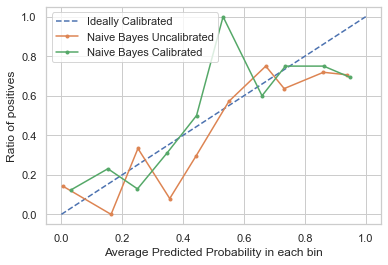

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(nb, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = nb.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'Naive Bayes Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'Naive Bayes Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [14]:
calibrated = CalibratedClassifierCV(nb, method='sigmoid', cv=10)
showResults(calibrated, "Naive Bayes Cal", X, Y)

K-fold cross-validation results:
Naive Bayes Cal  average accuracy is 0.747
Naive Bayes Cal  average log_loss is 0.555
Naive Bayes Cal  average brier score is 0.184
Naive Bayes Cal  average auc is 0.805
Naive Bayes Cal  average recall is 0.784
Naive Bayes Cal  average precision is 0.744
Naive Bayes Cal  average f1 is 0.759


In [14]:
#Feature Importance with extratreesclassifier Input
X = X_balanced[["Age" , "Oxygen_Saturation_Percent", "CKD","Respiratory_rate", "DiastolicBP", "SystolicBP",
                "BMI","Cancers","Average_Daily_Use_Cigarettes" ,"Fever", "Pantoprazole", "Abnormal_Lung_Signs",
                "Drug_history", "Current_Smoking", "Diabetes", "Cardiovascular_Disease" , "Dyspnea", "Hospitalization_14_days_ago",
                "Hypertension", "Antihypertensive_drug"]]
Y = Y_balanced

In [63]:
lr = LogisticRegression(random_state=5)

cv = GridSearchCV(lr,params_logistic,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 63 candidates, totalling 630 fits


C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [64]:
display_results(cv)

Best parameters are: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score is : 0.7096500169894665 


nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.646 + or -0.115 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.646 + or -0.115 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.584 + or -0.058 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.01, 'penalty'

In [15]:
lr = LogisticRegression(random_state=5, 
                        C = 1,
                        penalty = 'l1', 
                        solver = 'liblinear')
lr.fit(X,Y)

showResults(lr, "Logistic Regression", X, Y)

K-fold cross-validation results:
Logistic Regression  average accuracy is 0.710
Logistic Regression  average log_loss is 0.580
Logistic Regression  average brier score is 0.197
Logistic Regression  average auc is 0.764
Logistic Regression  average recall is 0.715
Logistic Regression  average precision is 0.703
Logistic Regression  average f1 is 0.707


In [66]:
nb = GaussianNB()

cv = GridSearchCV(nb,params_bayes,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [67]:
display_results(cv)

Best parameters are: {'var_smoothing': 0.002848035868435802}
Best Score is : 0.6764101257220523 


0.66 + or -0.119 for the {'var_smoothing': 1.0}
0.659 + or -0.119 for the {'var_smoothing': 0.8111308307896871}
0.66 + or -0.115 for the {'var_smoothing': 0.657933224657568}
0.662 + or -0.112 for the {'var_smoothing': 0.533669923120631}
0.662 + or -0.113 for the {'var_smoothing': 0.43287612810830584}
0.658 + or -0.108 for the {'var_smoothing': 0.3511191734215131}
0.659 + or -0.1 for the {'var_smoothing': 0.2848035868435802}
0.658 + or -0.101 for the {'var_smoothing': 0.23101297000831597}
0.656 + or -0.099 for the {'var_smoothing': 0.1873817422860384}
0.657 + or -0.098 for the {'var_smoothing': 0.15199110829529336}
0.655 + or -0.097 for the {'var_smoothing': 0.12328467394420659}
0.654 + or -0.097 for the {'var_smoothing': 0.1}
0.654 + or -0.093 for the {'var_smoothing': 0.08111308307896872}
0.657 + or -0.095 for the {'var_smoothing': 0.0657933224657568}
0.654 + or -0.095 for the {'var_smoo

In [16]:
nb = GaussianNB(var_smoothing= 0.002848035868435802)
nb.fit(X,Y)

showResults(nb, "Naive Bayes", X, Y)

K-fold cross-validation results:
Naive Bayes  average accuracy is 0.676
Naive Bayes  average log_loss is 0.683
Naive Bayes  average brier score is 0.224
Naive Bayes  average auc is 0.721
Naive Bayes  average recall is 0.676
Naive Bayes  average precision is 0.673
Naive Bayes  average f1 is 0.673


In [17]:
#Feature Importance with extratreesclassifier Input + Post admission variables
X = X_balanced[["ICU_admission", "Age", "Oxygen_Saturation_Percent", "CKD", "DiastolicBP", "Respiratory_rate",
               "SystolicBP", "Intubation_Duration_Day", "BMI", "Cancers", "Dyspnea", "Drug_history", "Pantoprazole",
               "Abnormal_Lung_Signs", "Fever", "Cardiovascular_Disease", "Antihypertensive_drug", "Hypertension",
               "Hospitalization_14_days_ago", "Average_Daily_Use_Cigarettes"]]
Y = Y_balanced

In [70]:
lr = LogisticRegression(random_state=5)

cv = GridSearchCV(lr,params_logistic,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 63 candidates, totalling 630 fits


C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [71]:
display_results(cv)

Best parameters are: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score is : 0.7779306829765547 


nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.754 + or -0.112 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.754 + or -0.112 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.526 + or -0.014 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.01, 'penalt

In [18]:
lr = LogisticRegression(random_state=5, 
                        C = 100,
                        penalty = 'l1', 
                        solver = 'liblinear')
lr.fit(X,Y)

showResults(lr, "Logistic Regression", X, Y)

K-fold cross-validation results:
Logistic Regression  average accuracy is 0.778
Logistic Regression  average log_loss is 0.497
Logistic Regression  average brier score is 0.160
Logistic Regression  average auc is 0.842
Logistic Regression  average recall is 0.785
Logistic Regression  average precision is 0.779
Logistic Regression  average f1 is 0.780


In [73]:
nb = GaussianNB()

cv = GridSearchCV(nb,params_bayes,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [74]:
display_results(cv)

Best parameters are: {'var_smoothing': 0.004328761281083057}
Best Score is : 0.7493034318722391 


0.737 + or -0.115 for the {'var_smoothing': 1.0}
0.737 + or -0.113 for the {'var_smoothing': 0.8111308307896871}
0.737 + or -0.113 for the {'var_smoothing': 0.657933224657568}
0.735 + or -0.11 for the {'var_smoothing': 0.533669923120631}
0.734 + or -0.111 for the {'var_smoothing': 0.43287612810830584}
0.73 + or -0.109 for the {'var_smoothing': 0.3511191734215131}
0.727 + or -0.11 for the {'var_smoothing': 0.2848035868435802}
0.729 + or -0.108 for the {'var_smoothing': 0.23101297000831597}
0.727 + or -0.105 for the {'var_smoothing': 0.1873817422860384}
0.73 + or -0.101 for the {'var_smoothing': 0.15199110829529336}
0.729 + or -0.1 for the {'var_smoothing': 0.12328467394420659}
0.731 + or -0.1 for the {'var_smoothing': 0.1}
0.731 + or -0.1 for the {'var_smoothing': 0.08111308307896872}
0.733 + or -0.095 for the {'var_smoothing': 0.0657933224657568}
0.736 + or -0.096 for the {'var_smoothing'

In [19]:
nb = GaussianNB(var_smoothing= 0.004328761281083057)
nb.fit(X,Y)

showResults(nb, "Naive Bayes", X, Y)

K-fold cross-validation results:
Naive Bayes  average accuracy is 0.749
Naive Bayes  average log_loss is 0.581
Naive Bayes  average brier score is 0.184
Naive Bayes  average auc is 0.805
Naive Bayes  average recall is 0.762
Naive Bayes  average precision is 0.753
Naive Bayes  average f1 is 0.755


In [20]:
#RFECV with Logistic Regression Input
X = X_balanced[["Abnormal_Lung_Signs", "Antihypertensive_drug", "CKD", "COPD", "Cancers", "Cardiovascular_Disease", 
                "Chestpain", "Current_Smoking", "Diabetes", "Drug_history", "Dyspnea", "Fever", "History_hookah", 
                "Hospitalization_14_days_ago", "Hypertension", "Immunosuppressant_Drugs", "Oxygen_Saturation_Percent", 
                "Pantoprazole", "Sex", "Sweating"]]
Y = Y_balanced

In [77]:
lr = LogisticRegression(random_state=5)

cv = GridSearchCV(lr,params_logistic,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 63 candidates, totalling 630 fits


C:\Users\alish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
350 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [78]:
display_results(cv)

Best parameters are: {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score is : 0.7217040434930343 


nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.663 + or -0.126 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.663 + or -0.126 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.627 + or -0.089 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.01, 'penalty

In [21]:
lr = LogisticRegression(random_state=5, 
                        C = 10,
                        penalty = 'l2', 
                        solver = 'newton-cg')
lr.fit(X,Y)

showResults(lr, "Logistic Regression", X, Y)

K-fold cross-validation results:
Logistic Regression  average accuracy is 0.722
Logistic Regression  average log_loss is 0.586
Logistic Regression  average brier score is 0.194
Logistic Regression  average auc is 0.770
Logistic Regression  average recall is 0.774
Logistic Regression  average precision is 0.694
Logistic Regression  average f1 is 0.730


In [80]:
nb = GaussianNB()

cv = GridSearchCV(nb,params_bayes,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [81]:
display_results(cv)

Best parameters are: {'var_smoothing': 0.08111308307896872}
Best Score is : 0.6755521576622494 


0.624 + or -0.09 for the {'var_smoothing': 1.0}
0.631 + or -0.09 for the {'var_smoothing': 0.8111308307896871}
0.635 + or -0.094 for the {'var_smoothing': 0.657933224657568}
0.648 + or -0.091 for the {'var_smoothing': 0.533669923120631}
0.655 + or -0.092 for the {'var_smoothing': 0.43287612810830584}
0.661 + or -0.092 for the {'var_smoothing': 0.3511191734215131}
0.668 + or -0.094 for the {'var_smoothing': 0.2848035868435802}
0.669 + or -0.096 for the {'var_smoothing': 0.23101297000831597}
0.672 + or -0.098 for the {'var_smoothing': 0.1873817422860384}
0.673 + or -0.097 for the {'var_smoothing': 0.15199110829529336}
0.675 + or -0.098 for the {'var_smoothing': 0.12328467394420659}
0.675 + or -0.097 for the {'var_smoothing': 0.1}
0.676 + or -0.092 for the {'var_smoothing': 0.08111308307896872}
0.673 + or -0.094 for the {'var_smoothing': 0.0657933224657568}
0.675 + or -0.093 for the {'var_smo

In [82]:
nb = GaussianNB(var_smoothing= 0.08111308307896872)
nb.fit(X,Y)

showResults(nb, "Naive Bayes", X, Y)

K-fold cross-validation results:
Naive Bayes  average accuracy is 0.675
Naive Bayes  average log_loss is 1.889
Naive Bayes  average brier score is 0.303
Naive Bayes  average auc is 0.756
Naive Bayes  average recall is 0.905
Naive Bayes  average precision is 0.619
Naive Bayes  average f1 is 0.735


In [10]:
#RFECV with Logistic Regression Input + Post admission variables
X = X_balanced[['Abnormal_Lung_Signs', 'Age', 'Antihypertensive_drug', 'BMI', 'CKD', 'COPD', 
                'Cancers', 'Cardiovascular_Disease', 'Chestpain', 'Current_Smoking', 'Diabetes', 
                'Drug_history', 'Dyspnea', 'Fever', 'History_hookah', 'Hospitalization_14_days_ago', 
                'Hypertension', 'ICU_admission', 'Immunosuppressant_Drugs', 'Intubation_Duration_Day', 
                'NIV_Duration_Day', 'Oxygen_Saturation_Percent', 'Pantoprazole', 'Sex', 'Sweating']]
Y = Y_balanced

In [84]:
lr = LogisticRegression(random_state=5)

cv = GridSearchCV(lr,params_logistic,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 63 candidates, totalling 630 fits


C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [85]:
display_results(cv)

Best parameters are: {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score is : 0.8121389738362217 


nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.773 + or -0.121 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.773 + or -0.121 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.549 + or -0.023 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.01, 'penalty

In [11]:
lr = LogisticRegression(random_state=5, 
                        C = 10,
                        penalty = 'l2', 
                        solver = 'newton-cg')
lr.fit(X,Y)

showResults(lr, "Logistic Regression", X, Y)

K-fold cross-validation results:
Logistic Regression  average accuracy is 0.812
Logistic Regression  average log_loss is 0.467
Logistic Regression  average brier score is 0.147
Logistic Regression  average auc is 0.863
Logistic Regression  average recall is 0.820
Logistic Regression  average precision is 0.810
Logistic Regression  average f1 is 0.814


C:\Users\alish\anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


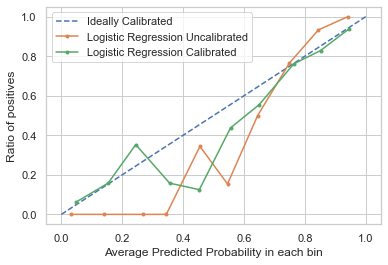

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(lr, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = lr.decision_function(xtest)
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'Logistic Regression Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'Logistic Regression Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [14]:
calibrated = CalibratedClassifierCV(lr, method='sigmoid', cv=10)
showResults(calibrated, "Logistic Regression Cal", X, Y)

K-fold cross-validation results:
Logistic Regression Cal  average accuracy is 0.804
Logistic Regression Cal  average log_loss is 0.464
Logistic Regression Cal  average brier score is 0.148
Logistic Regression Cal  average auc is 0.863
Logistic Regression Cal  average recall is 0.805
Logistic Regression Cal  average precision is 0.807
Logistic Regression Cal  average f1 is 0.805


In [87]:
nb = GaussianNB()

cv = GridSearchCV(nb,params_bayes,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [88]:
display_results(cv)

Best parameters are: {'var_smoothing': 2.848035868435799e-07}
Best Score is : 0.716106014271152 


0.702 + or -0.108 for the {'var_smoothing': 1.0}
0.704 + or -0.116 for the {'var_smoothing': 0.8111308307896871}
0.704 + or -0.116 for the {'var_smoothing': 0.657933224657568}
0.703 + or -0.111 for the {'var_smoothing': 0.533669923120631}
0.705 + or -0.113 for the {'var_smoothing': 0.43287612810830584}
0.71 + or -0.113 for the {'var_smoothing': 0.3511191734215131}
0.703 + or -0.11 for the {'var_smoothing': 0.2848035868435802}
0.699 + or -0.11 for the {'var_smoothing': 0.23101297000831597}
0.694 + or -0.11 for the {'var_smoothing': 0.1873817422860384}
0.695 + or -0.105 for the {'var_smoothing': 0.15199110829529336}
0.691 + or -0.103 for the {'var_smoothing': 0.12328467394420659}
0.694 + or -0.103 for the {'var_smoothing': 0.1}
0.693 + or -0.102 for the {'var_smoothing': 0.08111308307896872}
0.691 + or -0.099 for the {'var_smoothing': 0.0657933224657568}
0.689 + or -0.101 for the {'var_smoo

In [25]:
nb = GaussianNB(var_smoothing= 2.848035868435799e-07)
nb.fit(X,Y)

showResults(nb, "Naive Bayes", X, Y)

K-fold cross-validation results:
Naive Bayes  average accuracy is 0.716
Naive Bayes  average log_loss is 1.661
Naive Bayes  average brier score is 0.237
Naive Bayes  average auc is 0.843
Naive Bayes  average recall is 0.921
Naive Bayes  average precision is 0.656
Naive Bayes  average f1 is 0.766


In [26]:
#RFECV with Gradient Boosting Input
X = X_balanced[["Age", "CKD", "Cancers", "DiastolicBP", "Oxygen_Saturation_Percent"]]
Y = Y_balanced

In [91]:
lr = LogisticRegression(random_state=5)

cv = GridSearchCV(lr,params_logistic,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 63 candidates, totalling 630 fits


C:\Users\alish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
350 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [92]:
display_results(cv)

Best parameters are: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score is : 0.6742694529391777 


nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.541 + or -0.067 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.541 + or -0.067 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.665 + or -0.04 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.01, 'penalty':

In [27]:
lr = LogisticRegression(random_state=5, 
                        C = 1,
                        penalty = 'l1', 
                        solver = 'liblinear')
lr.fit(X,Y)

showResults(lr, "Logistic Regression", X, Y)

K-fold cross-validation results:
Logistic Regression  average accuracy is 0.674
Logistic Regression  average log_loss is 0.628
Logistic Regression  average brier score is 0.219
Logistic Regression  average auc is 0.708
Logistic Regression  average recall is 0.716
Logistic Regression  average precision is 0.662
Logistic Regression  average f1 is 0.687


In [94]:
nb = GaussianNB()

cv = GridSearchCV(nb,params_bayes,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [95]:
display_results(cv)

Best parameters are: {'var_smoothing': 0.001873817422860383}
Best Score is : 0.6540180088345227 


0.541 + or -0.053 for the {'var_smoothing': 1.0}
0.541 + or -0.055 for the {'var_smoothing': 0.8111308307896871}
0.54 + or -0.055 for the {'var_smoothing': 0.657933224657568}
0.54 + or -0.054 for the {'var_smoothing': 0.533669923120631}
0.54 + or -0.057 for the {'var_smoothing': 0.43287612810830584}
0.54 + or -0.057 for the {'var_smoothing': 0.3511191734215131}
0.54 + or -0.054 for the {'var_smoothing': 0.2848035868435802}
0.537 + or -0.047 for the {'var_smoothing': 0.23101297000831597}
0.535 + or -0.046 for the {'var_smoothing': 0.1873817422860384}
0.535 + or -0.046 for the {'var_smoothing': 0.15199110829529336}
0.533 + or -0.046 for the {'var_smoothing': 0.12328467394420659}
0.533 + or -0.052 for the {'var_smoothing': 0.1}
0.54 + or -0.056 for the {'var_smoothing': 0.08111308307896872}
0.554 + or -0.072 for the {'var_smoothing': 0.0657933224657568}
0.579 + or -0.07 for the {'var_smoothi

In [28]:
nb = GaussianNB(var_smoothing= 0.001873817422860383)
nb.fit(X,Y)

showResults(nb, "Naive Bayes", X, Y)

K-fold cross-validation results:
Naive Bayes  average accuracy is 0.654
Naive Bayes  average log_loss is 0.698
Naive Bayes  average brier score is 0.236
Naive Bayes  average auc is 0.682
Naive Bayes  average recall is 0.677
Naive Bayes  average precision is 0.649
Naive Bayes  average f1 is 0.660


In [29]:
#RFECV with Gradient Boosting Input + Post admission variables
X = X_balanced[['Age', 'CKD', 'ICU_admission', 'Intubation_Duration_Day']]
Y = Y_balanced

In [98]:
lr = LogisticRegression(random_state=5)

cv = GridSearchCV(lr,params_logistic,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 63 candidates, totalling 630 fits


C:\Users\alish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
350 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [99]:
display_results(cv)

Best parameters are: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score is : 0.7502633367312267 


nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.739 + or -0.082 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.739 + or -0.082 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.01, 'penalty': 

In [30]:
lr = LogisticRegression(random_state=5, 
                        C = 1,
                        penalty = 'l2', 
                        solver = 'newton-cg')
lr.fit(X,Y)

showResults(lr, "Logistic Regression", X, Y)

K-fold cross-validation results:
Logistic Regression  average accuracy is 0.750
Logistic Regression  average log_loss is 0.547
Logistic Regression  average brier score is 0.181
Logistic Regression  average auc is 0.828
Logistic Regression  average recall is 0.712
Logistic Regression  average precision is 0.787
Logistic Regression  average f1 is 0.743


In [101]:
nb = GaussianNB()

cv = GridSearchCV(nb,params_bayes,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [102]:
display_results(cv)

Best parameters are: {'var_smoothing': 0.533669923120631}
Best Score is : 0.7317703024125043 


0.731 + or -0.079 for the {'var_smoothing': 1.0}
0.731 + or -0.079 for the {'var_smoothing': 0.8111308307896871}
0.731 + or -0.079 for the {'var_smoothing': 0.657933224657568}
0.732 + or -0.08 for the {'var_smoothing': 0.533669923120631}
0.726 + or -0.079 for the {'var_smoothing': 0.43287612810830584}
0.722 + or -0.076 for the {'var_smoothing': 0.3511191734215131}
0.715 + or -0.074 for the {'var_smoothing': 0.2848035868435802}
0.716 + or -0.073 for the {'var_smoothing': 0.23101297000831597}
0.713 + or -0.078 for the {'var_smoothing': 0.1873817422860384}
0.713 + or -0.078 for the {'var_smoothing': 0.15199110829529336}
0.713 + or -0.078 for the {'var_smoothing': 0.12328467394420659}
0.713 + or -0.078 for the {'var_smoothing': 0.1}
0.714 + or -0.078 for the {'var_smoothing': 0.08111308307896872}
0.717 + or -0.074 for the {'var_smoothing': 0.0657933224657568}
0.718 + or -0.074 for the {'var_smoo

In [31]:
nb = GaussianNB(var_smoothing= 0.533669923120631)
nb.fit(X,Y)

showResults(nb, "Naive Bayes", X, Y)

K-fold cross-validation results:
Naive Bayes  average accuracy is 0.732
Naive Bayes  average log_loss is 0.582
Naive Bayes  average brier score is 0.196
Naive Bayes  average auc is 0.830
Naive Bayes  average recall is 0.671
Naive Bayes  average precision is 0.784
Naive Bayes  average f1 is 0.717


In [15]:
#RFECV with Random Forest Input
X = X_balanced[["Abnormal_Lung_Signs", "Age", "Antihypertensive_drug", "Average_Daily_Use_Cigarettes", "BMI", 
                "CKD", "COPD", "Cancers", "Cardiovascular_Disease", "Chestpain","Current_Smoking", 
                "Diabetes", "DiastolicBP", "Drug_history", "Dyspnea", "Fever", "History_hookah", 
                "Hospitalization_14_days_ago", "Hypertension", "Immunosuppressant_Drugs", 
                "Oxygen_Saturation_Percent", "Pantoprazole", "Respiratory_rate", "Sex", "Sweating", 
                "SystolicBP", "Total_Lung_Involvement_Percent"]]
Y = Y_balanced

In [105]:
lr = LogisticRegression(random_state=5)

cv = GridSearchCV(lr,params_logistic,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 63 candidates, totalling 630 fits


C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [106]:
display_results(cv)

Best parameters are: {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score is : 0.7336136595310908 


nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.666 + or -0.121 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.666 + or -0.121 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.635 + or -0.092 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.01, 'penalty

In [11]:
lr = LogisticRegression(random_state=5, 
                        C = 10,
                        penalty = 'l2', 
                        solver = 'newton-cg')
lr.fit(X,Y)

showResults(lr, "Logistic Regression", X, Y)

K-fold cross-validation results:
Logistic Regression  average accuracy is 0.734
Logistic Regression  average log_loss is 0.557
Logistic Regression  average brier score is 0.182
Logistic Regression  average auc is 0.798
Logistic Regression  average recall is 0.770
Logistic Regression  average precision is 0.714
Logistic Regression  average f1 is 0.739


C:\Users\alish\anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


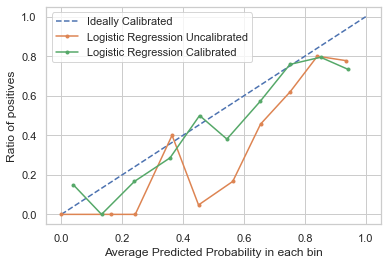

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(lr, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = lr.decision_function(xtest)
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'Logistic Regression Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'Logistic Regression Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [13]:
calibrated = CalibratedClassifierCV(lr, method='sigmoid', cv=10)
showResults(calibrated, "Logistic Regression Cal", X, Y)

K-fold cross-validation results:
Logistic Regression Cal  average accuracy is 0.740
Logistic Regression Cal  average log_loss is 0.550
Logistic Regression Cal  average brier score is 0.183
Logistic Regression Cal  average auc is 0.798
Logistic Regression Cal  average recall is 0.759
Logistic Regression Cal  average precision is 0.727
Logistic Regression Cal  average f1 is 0.741


In [108]:
nb = GaussianNB()

cv = GridSearchCV(nb,params_bayes,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [109]:
display_results(cv)

Best parameters are: {'var_smoothing': 0.012328467394420659}
Best Score is : 0.678304451240231 


0.627 + or -0.09 for the {'var_smoothing': 1.0}
0.633 + or -0.089 for the {'var_smoothing': 0.8111308307896871}
0.637 + or -0.096 for the {'var_smoothing': 0.657933224657568}
0.649 + or -0.089 for the {'var_smoothing': 0.533669923120631}
0.656 + or -0.088 for the {'var_smoothing': 0.43287612810830584}
0.663 + or -0.091 for the {'var_smoothing': 0.3511191734215131}
0.671 + or -0.094 for the {'var_smoothing': 0.2848035868435802}
0.67 + or -0.093 for the {'var_smoothing': 0.23101297000831597}
0.673 + or -0.097 for the {'var_smoothing': 0.1873817422860384}
0.675 + or -0.099 for the {'var_smoothing': 0.15199110829529336}
0.675 + or -0.096 for the {'var_smoothing': 0.12328467394420659}
0.676 + or -0.094 for the {'var_smoothing': 0.1}
0.675 + or -0.095 for the {'var_smoothing': 0.08111308307896872}
0.676 + or -0.091 for the {'var_smoothing': 0.0657933224657568}
0.677 + or -0.089 for the {'var_smo

In [16]:
nb = GaussianNB(var_smoothing= 0.012328467394420659)
nb.fit(X,Y)

showResults(nb, "Naive Bayes", X, Y)

K-fold cross-validation results:
Naive Bayes  average accuracy is 0.678
Naive Bayes  average log_loss is 1.711
Naive Bayes  average brier score is 0.294
Naive Bayes  average auc is 0.769
Naive Bayes  average recall is 0.907
Naive Bayes  average precision is 0.622
Naive Bayes  average f1 is 0.737


C:\Users\alish\anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


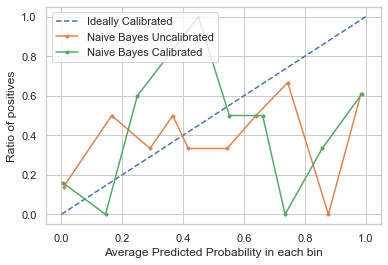

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(nb, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = nb.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'Naive Bayes Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'Naive Bayes Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [18]:
calibrated = CalibratedClassifierCV(nb, method='sigmoid', cv=10)
showResults(calibrated, "Naive Bayes Cal", X, Y)

K-fold cross-validation results:
Naive Bayes Cal  average accuracy is 0.683
Naive Bayes Cal  average log_loss is 0.598
Naive Bayes Cal  average brier score is 0.205
Naive Bayes Cal  average auc is 0.769
Naive Bayes Cal  average recall is 0.879
Naive Bayes Cal  average precision is 0.631
Naive Bayes Cal  average f1 is 0.734


In [35]:
#RFECV with Random Forest Input + Post admission variables
X = X_balanced[['Abnormal_Lung_Signs', 'Age', 'Average_Daily_Use_Cigarettes', 'BMI', 'CKD', 'Cancers',
                'DiastolicBP', 'Drug_history', 'Dyspnea', 'Fever', 'Hospitalization_14_days_ago',
                'Hypertension', 'ICU_admission', 'Intubation_Duration_Day', 'Oxygen_Saturation_Percent',
                'Pantoprazole', 'Respiratory_rate', 'SystolicBP']]
Y = Y_balanced

In [112]:
lr = LogisticRegression(random_state=5)

cv = GridSearchCV(lr,params_logistic,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 63 candidates, totalling 630 fits


C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [113]:
display_results(cv)

Best parameters are: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score is : 0.7807084607543323 


nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.752 + or -0.111 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.752 + or -0.111 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.528 + or -0.014 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.01, 'penalt

In [36]:
lr = LogisticRegression(random_state=5, 
                        C = 100,
                        penalty = 'l1', 
                        solver = 'liblinear')
lr.fit(X,Y)

showResults(lr, "Logistic Regression", X, Y)

C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

K-fold cross-validation results:
Logistic Regression  average accuracy is 0.781
Logistic Regression  average log_loss is 0.502
Logistic Regression  average brier score is 0.162
Logistic Regression  average auc is 0.838
Logistic Regression  average recall is 0.794
Logistic Regression  average precision is 0.778
Logistic Regression  average f1 is 0.785


In [115]:
nb = GaussianNB()

cv = GridSearchCV(nb,params_bayes,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [116]:
display_results(cv)

Best parameters are: {'var_smoothing': 0.003511191734215131}
Best Score is : 0.7464746856948692 


0.744 + or -0.094 for the {'var_smoothing': 1.0}
0.743 + or -0.092 for the {'var_smoothing': 0.8111308307896871}
0.744 + or -0.09 for the {'var_smoothing': 0.657933224657568}
0.741 + or -0.091 for the {'var_smoothing': 0.533669923120631}
0.737 + or -0.088 for the {'var_smoothing': 0.43287612810830584}
0.735 + or -0.086 for the {'var_smoothing': 0.3511191734215131}
0.733 + or -0.085 for the {'var_smoothing': 0.2848035868435802}
0.731 + or -0.084 for the {'var_smoothing': 0.23101297000831597}
0.729 + or -0.086 for the {'var_smoothing': 0.1873817422860384}
0.73 + or -0.085 for the {'var_smoothing': 0.15199110829529336}
0.736 + or -0.087 for the {'var_smoothing': 0.12328467394420659}
0.738 + or -0.087 for the {'var_smoothing': 0.1}
0.736 + or -0.086 for the {'var_smoothing': 0.08111308307896872}
0.737 + or -0.086 for the {'var_smoothing': 0.0657933224657568}
0.741 + or -0.09 for the {'var_smo

In [37]:
nb = GaussianNB(var_smoothing= 0.003511191734215131)
nb.fit(X,Y)

showResults(nb, "Naive Bayes", X, Y)

K-fold cross-validation results:
Naive Bayes  average accuracy is 0.746
Naive Bayes  average log_loss is 0.597
Naive Bayes  average brier score is 0.188
Naive Bayes  average auc is 0.802
Naive Bayes  average recall is 0.769
Naive Bayes  average precision is 0.744
Naive Bayes  average f1 is 0.754


In [38]:
#Feature importance with Random Forest Input
X = X_balanced[["Age", "CKD", "Oxygen_Saturation_Percent" , "DiastolicBP" , "BMI", 
                "Hypertension", "Cancers", "Cardiovascular_Disease", "Hospitalization_14_days_ago" ,
                "Abnormal_Lung_Signs", "Average_Daily_Use_Cigarettes" , "Pantoprazole"]]
Y = Y_balanced

In [119]:
lr = LogisticRegression(random_state=5)

cv = GridSearchCV(lr,params_logistic,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 63 candidates, totalling 630 fits


C:\Users\alish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
350 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [120]:
display_results(cv)

Best parameters are: {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score is : 0.6716445803601767 


nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.546 + or -0.071 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.546 + or -0.071 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.557 + or -0.069 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.01, 'penalty

In [39]:
lr = LogisticRegression(random_state=5, 
                        C = 10,
                        penalty = 'l2', 
                        solver = 'newton-cg')
lr.fit(X,Y)

showResults(lr, "Logistic Regression", X, Y)

K-fold cross-validation results:
Logistic Regression  average accuracy is 0.672
Logistic Regression  average log_loss is 0.619
Logistic Regression  average brier score is 0.214
Logistic Regression  average auc is 0.721
Logistic Regression  average recall is 0.687
Logistic Regression  average precision is 0.668
Logistic Regression  average f1 is 0.676


In [122]:
nb = GaussianNB()

cv = GridSearchCV(nb,params_bayes,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [123]:
display_results(cv)

Best parameters are: {'var_smoothing': 0.001}
Best Score is : 0.6355079850492695 


0.569 + or -0.055 for the {'var_smoothing': 1.0}
0.572 + or -0.053 for the {'var_smoothing': 0.8111308307896871}
0.572 + or -0.055 for the {'var_smoothing': 0.657933224657568}
0.577 + or -0.055 for the {'var_smoothing': 0.533669923120631}
0.579 + or -0.058 for the {'var_smoothing': 0.43287612810830584}
0.582 + or -0.058 for the {'var_smoothing': 0.3511191734215131}
0.584 + or -0.057 for the {'var_smoothing': 0.2848035868435802}
0.581 + or -0.055 for the {'var_smoothing': 0.23101297000831597}
0.58 + or -0.055 for the {'var_smoothing': 0.1873817422860384}
0.581 + or -0.051 for the {'var_smoothing': 0.15199110829529336}
0.58 + or -0.053 for the {'var_smoothing': 0.12328467394420659}
0.583 + or -0.052 for the {'var_smoothing': 0.1}
0.584 + or -0.055 for the {'var_smoothing': 0.08111308307896872}
0.58 + or -0.054 for the {'var_smoothing': 0.0657933224657568}
0.587 + or -0.056 for the {'var_smoothing': 0.0533

In [40]:
nb = GaussianNB(var_smoothing= 0.001)
nb.fit(X,Y)

showResults(nb, "Naive Bayes", X, Y)

K-fold cross-validation results:
Naive Bayes  average accuracy is 0.636
Naive Bayes  average log_loss is 0.716
Naive Bayes  average brier score is 0.241
Naive Bayes  average auc is 0.673
Naive Bayes  average recall is 0.625
Naive Bayes  average precision is 0.638
Naive Bayes  average f1 is 0.631


In [19]:
#Feature importance with Random Forest Input + Post admission variables
X = X_balanced[["Intubation_Duration_Day", "Cancers", "CKD", "ICU_admission", "DiastolicBP",
               "SystolicBP", "Oxygen_Saturation_Percent", "Hospitalization_14_days_ago", "Chestpain",
               "Antihypertensive_drug", "Sweating", "BMI", "Cardiovascular_Disease", "Pantoprazole", 
               "Current_Smoking", "Average_Daily_Use_Cigarettes"]]
Y = Y_balanced

In [126]:
lr = LogisticRegression(random_state=5)

cv = GridSearchCV(lr,params_logistic,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 63 candidates, totalling 630 fits


C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\alish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
350 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [127]:
display_results(cv)

Best parameters are: {'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score is : 0.7714576962283385 


nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.749 + or -0.087 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.749 + or -0.087 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.511 + or -0.009 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.01, 'penalty':

In [42]:
lr = LogisticRegression(random_state=5, 
                        C = 1000,
                        penalty = 'l2', 
                        solver = 'lbfgs')
lr.fit(X,Y)

showResults(lr, "Logistic Regression", X, Y)

C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

K-fold cross-validation results:
Logistic Regression  average accuracy is 0.771
Logistic Regression  average log_loss is 0.495
Logistic Regression  average brier score is 0.160
Logistic Regression  average auc is 0.850
Logistic Regression  average recall is 0.768
Logistic Regression  average precision is 0.779
Logistic Regression  average f1 is 0.772


C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [129]:
nb = GaussianNB()

cv = GridSearchCV(nb,params_bayes,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [130]:
display_results(cv)

Best parameters are: {'var_smoothing': 0.8111308307896871}
Best Score is : 0.7613914373088686 


0.757 + or -0.106 for the {'var_smoothing': 1.0}
0.761 + or -0.108 for the {'var_smoothing': 0.8111308307896871}
0.756 + or -0.098 for the {'var_smoothing': 0.657933224657568}
0.756 + or -0.098 for the {'var_smoothing': 0.533669923120631}
0.755 + or -0.098 for the {'var_smoothing': 0.43287612810830584}
0.752 + or -0.096 for the {'var_smoothing': 0.3511191734215131}
0.75 + or -0.096 for the {'var_smoothing': 0.2848035868435802}
0.751 + or -0.09 for the {'var_smoothing': 0.23101297000831597}
0.736 + or -0.092 for the {'var_smoothing': 0.1873817422860384}
0.724 + or -0.102 for the {'var_smoothing': 0.15199110829529336}
0.723 + or -0.103 for the {'var_smoothing': 0.12328467394420659}
0.72 + or -0.106 for the {'var_smoothing': 0.1}
0.719 + or -0.107 for the {'var_smoothing': 0.08111308307896872}
0.712 + or -0.103 for the {'var_smoothing': 0.0657933224657568}
0.7 + or -0.098 for the {'var_smoothi

In [20]:
nb = GaussianNB(var_smoothing= 0.8111308307896871)
nb.fit(X,Y)

showResults(nb, "Naive Bayes", X, Y)

K-fold cross-validation results:
Naive Bayes  average accuracy is 0.761
Naive Bayes  average log_loss is 0.560
Naive Bayes  average brier score is 0.187
Naive Bayes  average auc is 0.829
Naive Bayes  average recall is 0.818
Naive Bayes  average precision is 0.744
Naive Bayes  average f1 is 0.778


C:\Users\alish\anaconda3\lib\site-packages\sklearn\calibration.py:964: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


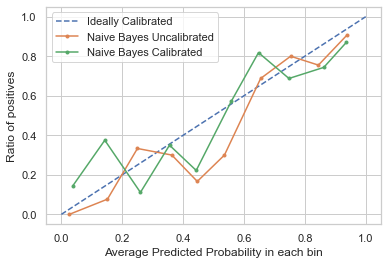

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=5)
calibrated = CalibratedClassifierCV(nb, method='sigmoid', cv=10)
calibrated.fit(xtrain, ytrain)
probs = calibrated.predict_proba(xtest)[:, 1]
uncalibrated = nb.predict_proba(xtest)[:,1]
fop_uncalibrated, mpv_uncalibrated = calibration_curve(ytest, uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(ytest, probs, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Ideally Calibrated')
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.', label = 'Naive Bayes Uncalibrated')
plt.plot(mpv_calibrated, fop_calibrated, marker='.', label = 'Naive Bayes Calibrated')
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [22]:
calibrated = CalibratedClassifierCV(nb, method='sigmoid', cv=10)
showResults(calibrated, "Naive Bayes Cal", X, Y)

K-fold cross-validation results:
Naive Bayes Cal  average accuracy is 0.761
Naive Bayes Cal  average log_loss is 0.530
Naive Bayes Cal  average brier score is 0.174
Naive Bayes Cal  average auc is 0.828
Naive Bayes Cal  average recall is 0.746
Naive Bayes Cal  average precision is 0.778
Naive Bayes Cal  average f1 is 0.760


In [44]:
#Feature Importance Gradient Boosting
X = X_balanced[["Age" , "Oxygen_Saturation_Percent", "CKD","Respiratory_rate", "DiastolicBP", 
                "SystolicBP","BMI", "Average_Daily_Use_Cigarettes" , "Pantoprazole", "Cancers",
                "Hypertension", "Abnormal_Lung_Signs", "Drug_history", "Sex", 
                "Total_Lung_Involvement_Percent", "Hospitalization_14_days_ago",
                "Current_Smoking", "Cardiovascular_Disease", "COPD", "Diabetes"]]
Y = Y_balanced

In [133]:
lr = LogisticRegression(random_state=5)

cv = GridSearchCV(lr,params_logistic,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 63 candidates, totalling 630 fits


C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [134]:
display_results(cv)

Best parameters are: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score is : 0.6911145090044173 


nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.591 + or -0.071 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.591 + or -0.071 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.589 + or -0.063 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.01, 'penalty'

In [45]:
lr = LogisticRegression(random_state=5, 
                        C = 1,
                        penalty = 'l1', 
                        solver = 'liblinear')
lr.fit(X,Y)

showResults(lr, "Logistic Regression", X, Y)

K-fold cross-validation results:
Logistic Regression  average accuracy is 0.691
Logistic Regression  average log_loss is 0.594
Logistic Regression  average brier score is 0.203
Logistic Regression  average auc is 0.750
Logistic Regression  average recall is 0.716
Logistic Regression  average precision is 0.682
Logistic Regression  average f1 is 0.695


In [136]:
nb = GaussianNB()

cv = GridSearchCV(nb,params_bayes,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [137]:
display_results(cv)

Best parameters are: {'var_smoothing': 0.0004328761281083057}
Best Score is : 0.6541454298335032 


0.618 + or -0.07 for the {'var_smoothing': 1.0}
0.616 + or -0.071 for the {'var_smoothing': 0.8111308307896871}
0.619 + or -0.072 for the {'var_smoothing': 0.657933224657568}
0.622 + or -0.075 for the {'var_smoothing': 0.533669923120631}
0.622 + or -0.076 for the {'var_smoothing': 0.43287612810830584}
0.624 + or -0.081 for the {'var_smoothing': 0.3511191734215131}
0.625 + or -0.083 for the {'var_smoothing': 0.2848035868435802}
0.628 + or -0.086 for the {'var_smoothing': 0.23101297000831597}
0.627 + or -0.088 for the {'var_smoothing': 0.1873817422860384}
0.623 + or -0.089 for the {'var_smoothing': 0.15199110829529336}
0.624 + or -0.084 for the {'var_smoothing': 0.12328467394420659}
0.626 + or -0.082 for the {'var_smoothing': 0.1}
0.632 + or -0.084 for the {'var_smoothing': 0.08111308307896872}
0.633 + or -0.084 for the {'var_smoothing': 0.0657933224657568}
0.634 + or -0.085 for the {'var_

In [46]:
nb = GaussianNB(var_smoothing= 0.0004328761281083057)
nb.fit(X,Y)

showResults(nb, "Naive Bayes", X, Y)

K-fold cross-validation results:
Naive Bayes  average accuracy is 0.654
Naive Bayes  average log_loss is 0.889
Naive Bayes  average brier score is 0.255
Naive Bayes  average auc is 0.691
Naive Bayes  average recall is 0.740
Naive Bayes  average precision is 0.636
Naive Bayes  average f1 is 0.682


In [47]:
#Feature Importance Gradient Boosting + Post admission variables
X = X_balanced[["ICU_admission", "Age", "Intubation_Duration_Day", "Oxygen_Saturation_Percent", "CKD", 
               "Cancers", "Respiratory_rate", "SystolicBP", "DiastolicBP", "BMI", "Average_Daily_Use_Cigarettes",
               "Drug_history", "Abnormal_Lung_Signs", "COPD", "Sweating", "Total_Lung_Involvement_Percent", 
                "Chestpain", "Cardiovascular_Disease", "Sex", "Hospitalization_14_days_ago"]]
Y = Y_balanced

In [140]:
lr = LogisticRegression(random_state=5)

cv = GridSearchCV(lr,params_logistic,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 63 candidates, totalling 630 fits


C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\alish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
350 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [141]:
display_results(cv)

Best parameters are: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score is : 0.7908511722731907 


nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.75 + or -0.103 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.75 + or -0.103 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.563 + or -0.043 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.01, 'penalty': 

In [48]:
lr = LogisticRegression(random_state=5, 
                        C = 1,
                        penalty = 'l1', 
                        solver = 'liblinear')
lr.fit(X,Y)

showResults(lr, "Logistic Regression", X, Y)

K-fold cross-validation results:
Logistic Regression  average accuracy is 0.791
Logistic Regression  average log_loss is 0.485
Logistic Regression  average brier score is 0.156
Logistic Regression  average auc is 0.855
Logistic Regression  average recall is 0.783
Logistic Regression  average precision is 0.803
Logistic Regression  average f1 is 0.791


In [143]:
nb = GaussianNB()

cv = GridSearchCV(nb,params_bayes,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [144]:
display_results(cv)

Best parameters are: {'var_smoothing': 8.111308307896872e-07}
Best Score is : 0.7178389398572886 


0.716 + or -0.116 for the {'var_smoothing': 1.0}
0.715 + or -0.117 for the {'var_smoothing': 0.8111308307896871}
0.709 + or -0.11 for the {'var_smoothing': 0.657933224657568}
0.704 + or -0.107 for the {'var_smoothing': 0.533669923120631}
0.702 + or -0.099 for the {'var_smoothing': 0.43287612810830584}
0.701 + or -0.097 for the {'var_smoothing': 0.3511191734215131}
0.694 + or -0.096 for the {'var_smoothing': 0.2848035868435802}
0.689 + or -0.102 for the {'var_smoothing': 0.23101297000831597}
0.685 + or -0.101 for the {'var_smoothing': 0.1873817422860384}
0.685 + or -0.098 for the {'var_smoothing': 0.15199110829529336}
0.682 + or -0.1 for the {'var_smoothing': 0.12328467394420659}
0.677 + or -0.102 for the {'var_smoothing': 0.1}
0.676 + or -0.102 for the {'var_smoothing': 0.08111308307896872}
0.674 + or -0.099 for the {'var_smoothing': 0.0657933224657568}
0.675 + or -0.098 for the {'var_sm

In [49]:
nb = GaussianNB(var_smoothing= 8.111308307896872e-07)
nb.fit(X,Y)

showResults(nb, "Naive Bayes", X, Y)

K-fold cross-validation results:
Naive Bayes  average accuracy is 0.718
Naive Bayes  average log_loss is 1.156
Naive Bayes  average brier score is 0.212
Naive Bayes  average auc is 0.821
Naive Bayes  average recall is 0.832
Naive Bayes  average precision is 0.684
Naive Bayes  average f1 is 0.749


In [50]:
#Physician Opinion Input 
X = X_balanced[["Age", "BMI", "SystolicBP", "DiastolicBP", "Respiratory_rate",
            "Oxygen_Saturation_Percent", "Total_Lung_Involvement_Percent", 
            "Sex", "Current_Smoking", "History_hookah", "Drug_history", "Fever", "Dyspnea", "Chestpain", 
            "Diabetes", "Hypertension", "Cancers", "Cardiovascular_Disease", "CKD", "COPD", "Immunosuppressant_Drugs"]]
Y = Y_balanced

In [147]:
lr = LogisticRegression(random_state=5)

cv = GridSearchCV(lr,params_logistic,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 63 candidates, totalling 630 fits


C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [148]:
display_results(cv)

Best parameters are: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score is : 0.7336221542643561 


nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.665 + or -0.119 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.665 + or -0.119 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.628 + or -0.091 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.01, 'penalty'

In [51]:
lr = LogisticRegression(random_state=5, 
                        C = 1,
                        penalty = 'l1', 
                        solver = 'liblinear')
lr.fit(X,Y)

showResults(lr, "Logistic Regression", X, Y)

K-fold cross-validation results:
Logistic Regression  average accuracy is 0.734
Logistic Regression  average log_loss is 0.555
Logistic Regression  average brier score is 0.185
Logistic Regression  average auc is 0.792
Logistic Regression  average recall is 0.765
Logistic Regression  average precision is 0.715
Logistic Regression  average f1 is 0.738


In [150]:
nb = GaussianNB()

cv = GridSearchCV(nb,params_bayes,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [151]:
display_results(cv)

Best parameters are: {'var_smoothing': 0.12328467394420659}
Best Score is : 0.6718059802922187 


0.632 + or -0.094 for the {'var_smoothing': 1.0}
0.635 + or -0.091 for the {'var_smoothing': 0.8111308307896871}
0.647 + or -0.09 for the {'var_smoothing': 0.657933224657568}
0.652 + or -0.091 for the {'var_smoothing': 0.533669923120631}
0.653 + or -0.089 for the {'var_smoothing': 0.43287612810830584}
0.661 + or -0.094 for the {'var_smoothing': 0.3511191734215131}
0.664 + or -0.099 for the {'var_smoothing': 0.2848035868435802}
0.665 + or -0.094 for the {'var_smoothing': 0.23101297000831597}
0.667 + or -0.091 for the {'var_smoothing': 0.1873817422860384}
0.671 + or -0.093 for the {'var_smoothing': 0.15199110829529336}
0.672 + or -0.093 for the {'var_smoothing': 0.12328467394420659}
0.666 + or -0.091 for the {'var_smoothing': 0.1}
0.664 + or -0.091 for the {'var_smoothing': 0.08111308307896872}
0.663 + or -0.092 for the {'var_smoothing': 0.0657933224657568}
0.659 + or -0.086 for the {'var_sm

In [52]:
nb = GaussianNB(var_smoothing= 0.12328467394420659)
nb.fit(X,Y)

showResults(nb, "Naive Bayes", X, Y)

K-fold cross-validation results:
Naive Bayes  average accuracy is 0.672
Naive Bayes  average log_loss is 0.864
Naive Bayes  average brier score is 0.251
Naive Bayes  average auc is 0.758
Naive Bayes  average recall is 0.892
Naive Bayes  average precision is 0.618
Naive Bayes  average f1 is 0.729


In [53]:
#Physician Opinion Input + Post admission variables
X = X_balanced[["Age", "BMI", "SystolicBP", "DiastolicBP", "Respiratory_rate",
            "Oxygen_Saturation_Percent", "Total_Lung_Involvement_Percent", 
            "Sex", "Current_Smoking", "History_hookah", "Drug_history", "Fever", "Dyspnea", "Chestpain", 
            "Diabetes", "Hypertension", "Cancers", "Cardiovascular_Disease", "CKD", "COPD", "Immunosuppressant_Drugs",
            'Intubation_Duration_Day','NIV_Duration_Day',"ICU_admission"]]
Y = Y_balanced

In [154]:
lr = LogisticRegression(random_state=5)

cv = GridSearchCV(lr,params_logistic,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 63 candidates, totalling 630 fits


C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alish\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [155]:
display_results(cv)

Best parameters are: {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score is : 0.7937223921168876 


nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.784 + or -0.122 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.784 + or -0.122 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.525 + or -0.017 for the {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan + or -nan for the {'C': 0.001, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan + or -nan for the {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.5 + or -0.003 for the {'C': 0.01, 'penalty

In [54]:
lr = LogisticRegression(random_state=5, 
                        C = 10,
                        penalty = 'l2', 
                        solver = 'newton-cg')
lr.fit(X,Y)

showResults(lr, "Logistic Regression", X, Y)

K-fold cross-validation results:
Logistic Regression  average accuracy is 0.794
Logistic Regression  average log_loss is 0.471
Logistic Regression  average brier score is 0.150
Logistic Regression  average auc is 0.860
Logistic Regression  average recall is 0.801
Logistic Regression  average precision is 0.795
Logistic Regression  average f1 is 0.797


In [157]:
nb = GaussianNB()

cv = GridSearchCV(nb,params_bayes,cv=10, verbose=1)
cv.fit(X,Y.values.ravel())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [158]:
display_results(cv)

Best parameters are: {'var_smoothing': 2.310129700083158e-08}
Best Score is : 0.7326622494053686 


0.73 + or -0.115 for the {'var_smoothing': 1.0}
0.728 + or -0.114 for the {'var_smoothing': 0.8111308307896871}
0.727 + or -0.115 for the {'var_smoothing': 0.657933224657568}
0.727 + or -0.114 for the {'var_smoothing': 0.533669923120631}
0.729 + or -0.113 for the {'var_smoothing': 0.43287612810830584}
0.724 + or -0.112 for the {'var_smoothing': 0.3511191734215131}
0.726 + or -0.117 for the {'var_smoothing': 0.2848035868435802}
0.72 + or -0.114 for the {'var_smoothing': 0.23101297000831597}
0.719 + or -0.11 for the {'var_smoothing': 0.1873817422860384}
0.714 + or -0.106 for the {'var_smoothing': 0.15199110829529336}
0.707 + or -0.107 for the {'var_smoothing': 0.12328467394420659}
0.707 + or -0.106 for the {'var_smoothing': 0.1}
0.701 + or -0.11 for the {'var_smoothing': 0.08111308307896872}
0.699 + or -0.106 for the {'var_smoothing': 0.0657933224657568}
0.694 + or -0.106 for the {'var_smo

In [55]:
nb = GaussianNB(var_smoothing= 2.310129700083158e-08)
nb.fit(X,Y)

showResults(nb, "Naive Bayes", X, Y)

K-fold cross-validation results:
Naive Bayes  average accuracy is 0.733
Naive Bayes  average log_loss is 1.503
Naive Bayes  average brier score is 0.219
Naive Bayes  average auc is 0.832
Naive Bayes  average recall is 0.877
Naive Bayes  average precision is 0.687
Naive Bayes  average f1 is 0.769
